In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the new data and populate the old data
obsdata = pd.read_csv('../data_files/good_qual_1deg.csv', parse_dates=['Date'])
print('** SUMMARY STATISTICS **')
print('Unique observation names:', len(obsdata.groupby('Observation')))
print('Total 1-degree slices:', len(obsdata))
print('Starting date:', obsdata['Date'].min())
print('Ending date:', obsdata['Date'].max())
print('Time span:', obsdata['Date'].max()-obsdata['Date'].min())

** SUMMARY STATISTICS **
Unique observation names: 152
Total 1-degree slices: 36332
Starting date: 2004-06-20 20:03:28
Ending date: 2017-09-07 02:15:23
Time span: 4826 days 06:11:55


# Phase Curve with All Slices

Ratio min -0.5472304479124454 Max 0.8290858986018422 Sigma 0.11661005630475657
Ratio min -0.22254608760986444 Max 0.2522746279493846 Sigma 0.08894470567772579
Ratio min -0.17314214174148093 Max 0.18573087280588177 Sigma 0.07752376423468796
Ratio min -0.1533675390280564 Max 0.15954313024483666 Sigma 0.07141551873359396
Ratio min -0.1416690734833884 Max 0.14583493453379 Sigma 0.06765092837186278
Ratio min -0.13484028265005832 Max 0.13706694599152566 Sigma 0.06528544064662813
Ratio min -0.13048627108640978 Max 0.13176071990097926 Sigma 0.06365721676808145
Ratio min -0.12704956316995836 Max 0.1282515460000413 Sigma 0.06258337471793105
Ratio min -0.12515586098098372 Max 0.12587996319504935 Sigma 0.061670746473886276
Ratio min -0.12304345880773342 Max 0.12375670589773924 Sigma 0.06100857970772968
Ratio min -0.12197890066369838 Max 0.12235626517498674 Sigma 0.06051962601642716
Ratio min -0.12098098856475732 Max 0.12120434109454335 Sigma 0.0601840587474977
Ratio min -0.12029903310643927 Max 0.

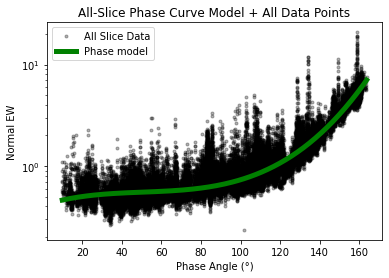

In [3]:
# Fit a phase curve and remove data points more than 2 sigma away
# Do the modeling on phasedata, which is a copy we can remove the outliers from
phasedata = obsdata.copy()
nstd = 2
while True:
    phase_coeff = np.polyfit(phasedata['Mean Phase'], np.log10(phasedata['Normal EW']), 3)
    phase_model = 10**np.polyval(phase_coeff, phasedata['Mean Phase'])
    ratio = np.log10(phasedata['Normal EW'] / phase_model)
    std = np.std(ratio)
    print('Ratio min', ratio.min(), 'Max', ratio.max(), 'Sigma', std)
    oldlen = len(phasedata)
    phasedata = phasedata[ratio.abs() < nstd*std]
    if len(phasedata) == oldlen:
        break
# Now record the model back onto the main obsdata
obsdata['Phase Model'] = 10**np.polyval(phase_coeff, obsdata['Mean Phase'])

# Plot the individual slice data points
plt.plot(obsdata['Mean Phase'], obsdata['Normal EW'], '.', color='black', alpha=0.3, 
         label='All Slice Data')

# Plot the phase model sampled at 1-degree intervals
xrange = np.arange(obsdata['Mean Phase'].min(), obsdata['Mean Phase'].max()+1)
full_phase_model = 10**np.polyval(phase_coeff, xrange)
plt.plot(xrange, full_phase_model, '-', color='green', lw=5, label='Phase model')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle (°)')
plt.ylabel('Normal EW')
_=plt.title('All-Slice Phase Curve Model + All Data Points')

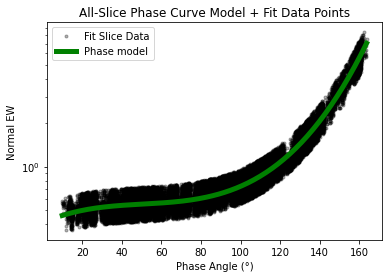

In [4]:
# Now plot the same phase curve, but with only the data points that were used in the 
# model fit
plt.plot(phasedata['Mean Phase'], phasedata['Normal EW'], '.', color='black', alpha=0.3,
         label='Fit Slice Data')
plt.plot(xrange, full_phase_model, '-', color='green', lw=5, label='Phase model')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle (°)')
plt.ylabel('Normal EW')
_=plt.title('All-Slice Phase Curve Model + Fit Data Points')

Text(0, 0.5, 'NEW / Phase Curve')

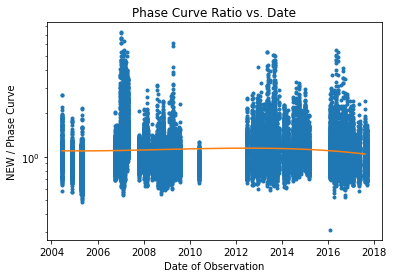

In [5]:
# Plot NEW/Phase Curve ratio vs. Time with a fit curve with all data
time0 = np.datetime64('1970-01-01T00:00:00')
obsdata['Date_secs'] = (obsdata['Date']-time0).dt.total_seconds()/86400
obsdata['Phase Curve Ratio'] = obsdata['Normal EW'] / obsdata['Phase Model']
timecoeff = np.polyfit(obsdata['Date_secs'], obsdata['Phase Curve Ratio'], 3)
plt.plot(obsdata['Date'], obsdata['Phase Curve Ratio'], '.')
timerange = np.arange(obsdata['Date_secs'].min(), obsdata['Date_secs'].max(), 100)
timefit = np.polyval(timecoeff, timerange)
plt.plot(timerange, timefit, '-')
plt.yscale('log')
plt.title('Phase Curve Ratio vs. Date')
plt.xlabel('Date of Observation')
plt.ylabel('NEW / Phase Curve')

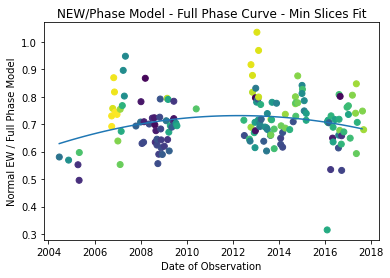

In [26]:
# Plot minimum slices only NEW/Phase Curve ratio vs. Time with a fit curve
mindata=obsdata.copy().groupby('Observation').min()
mindata['Phase Model'] = 10**np.polyval(phase_coeff, mindata['Mean Phase'])
mindata['Phase Curve Ratio'] = mindata['Normal EW'] / mindata['Phase Model']
timecoeff = np.polyfit(mindata['Date_secs'], mindata['Phase Curve Ratio'], 2)
timerange = np.arange(mindata['Date_secs'].min(), mindata['Date_secs'].max(), 100)
timefit = np.polyval(timecoeff, timerange)
plt.scatter(mindata['Date'], mindata['Phase Curve Ratio'], c=mindata['Mean Phase'])
plt.plot(timerange, timefit, '-')
plt.xlabel('Date of Observation')
plt.ylabel('Normal EW / Full Phase Model')
_=plt.title('NEW/Phase Model - Full Phase Curve - Min Slices Fit')

# Phase Curve with Minimum Slices Only

Ratio min -0.34773424574752254 Max 0.14505701972083024 Sigma 0.055327488134658494
Ratio min -0.09977542940134092 Max 0.0968461960427838 Sigma 0.04202197961402167
Ratio min -0.08067691155776065 Max 0.07570053063680916 Sigma 0.03655315546380746
Ratio min -0.0728775942770578 Max 0.06875144271213927 Sigma 0.032950447165607466
Ratio min -0.06177604537120543 Max 0.06563021089627377 Sigma 0.031513743590305864
Ratio min -0.06200011603258707 Max 0.06266946117068652 Sigma 0.031082921394261054
Ratio min -0.0610531511243411 Max 0.06128692339244342 Sigma 0.03069061736321464


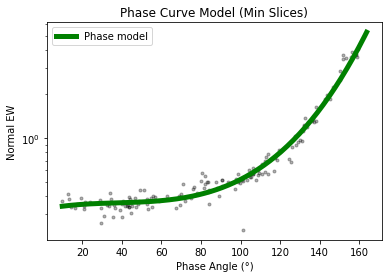

In [27]:
# Fit a phase curve and remove data points more than 2 sigma away
minphasedata = mindata.copy()
nstd = 2
while True:
    min_coeff = np.polyfit(minphasedata['Mean Phase'], np.log10(minphasedata['Normal EW']), 3)
    min_phase_model = 10**np.polyval(min_coeff, minphasedata['Mean Phase'])
    minphasedata['Phase Ratio'] = ratio = np.log10(minphasedata['Normal EW'] / min_phase_model)
    std = np.std(ratio)
    print('Ratio min', ratio.min(), 'Max', ratio.max(), 'Sigma', std)
    oldlen = len(minphasedata)
    minphasedata = minphasedata[minphasedata['Phase Ratio'].abs() < nstd*std]
    if len(minphasedata) != oldlen:
        continue
    break
    
mindata['Min Phase Model'] = 10**np.polyval(min_coeff, mindata['Mean Phase'])
xrange = np.arange(obsdata['Mean Phase'].min(), obsdata['Mean Phase'].max()+1)
#plt.errorbar(phasedata['Mean Phase'], phasedata['Normal EW'], yerr=phasedata['Normal EW Std'], fmt='.', color='black', alpha=0.1)
plt.plot(mindata['Mean Phase'], mindata['Normal EW'], '.', color='black', alpha=0.3)
min_phase_model = 10**np.polyval(min_coeff, xrange)
plt.plot(xrange, min_phase_model, '-', color='green', lw=5, label='Phase model')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle (°)')
plt.ylabel('Normal EW')
_=plt.title('Phase Curve Model (Min Slices)')

** Statistics - ratio of full phase curve / min phase curve
Ratio min: 1.3107020996456904
Ratio max: 1.5169943106782242
Ratio mean: 1.415911950673643
Ratio median: 1.4198185518727178


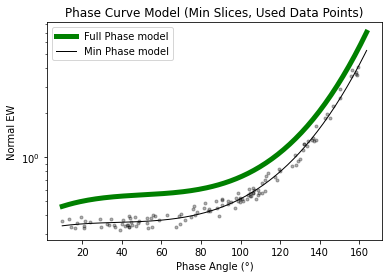

In [32]:
plt.plot(minphasedata['Mean Phase'], minphasedata['Normal EW'], '.', color='black', alpha=0.3)
plt.plot(xrange, full_phase_model, '-', color='green', lw=5, label='Full Phase model')
plt.plot(xrange, min_phase_model, '-', color='black', lw=1, label='Min Phase model')
plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle (°)')
plt.ylabel('Normal EW')
_=plt.title('Phase Curve Model (Min Slices, Used Data Points)')
print('** Statistics - ratio of full phase curve / min phase curve')
ratio = full_phase_model / min_phase_model
print('Ratio min:', ratio.min())
print('Ratio max:', ratio.max())
print('Ratio mean:', ratio.mean())
print('Ratio median:', np.median(ratio))

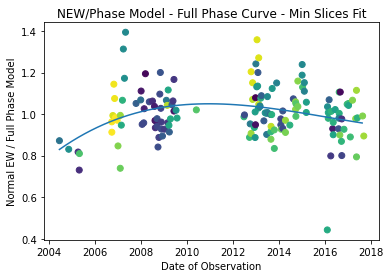

In [29]:
mindata['Min Phase Curve Ratio'] = mindata['Normal EW'] / mindata['Min Phase Model']
timecoeff = np.polyfit(mindata['Date_secs'], mindata['Min Phase Curve Ratio'], 3)
plt.scatter(mindata['Date'], mindata['Min Phase Curve Ratio'], c=mindata['Mean Phase'])
timerange = np.arange(mindata['Date_secs'].min(), mindata['Date_secs'].max(), 100)
timefit = np.polyval(timecoeff, timerange)
plt.plot(timerange, timefit, '-')
plt.xlabel('Date of Observation')
plt.ylabel('Normal EW / Min Phase Model')
_=plt.title('NEW/Phase Model - Min Phase Curve - Min Slices Fit')

In [35]:
list(mindata['Mean Phase'])

[67.148,
 31.159,
 117.138,
 29.626,
 84.217,
 158.326,
 158.827,
 150.507,
 156.194,
 155.754,
 159.676,
 158.635,
 131.108,
 101.411,
 125.348,
 136.544,
 82.189,
 106.245,
 83.711,
 80.261,
 54.916,
 62.899,
 19.054,
 42.504,
 43.011,
 23.685,
 12.623,
 44.182,
 29.005,
 21.222,
 14.243,
 29.222,
 20.921,
 41.529,
 48.281,
 44.718,
 38.984,
 43.583,
 48.971,
 40.291,
 36.168,
 43.787,
 53.031,
 36.316,
 69.907,
 142.868,
 98.942,
 33.556,
 99.95,
 54.994,
 100.784,
 52.817,
 34.347,
 17.12,
 33.784,
 88.173,
 98.89,
 119.861,
 108.725,
 44.384,
 110.871,
 71.744,
 137.386,
 153.357,
 150.463,
 143.836,
 103.45,
 93.851,
 89.304,
 16.345,
 9.787,
 71.084,
 87.334,
 151.986,
 90.621,
 51.018,
 90.846,
 152.0,
 146.943,
 68.744,
 77.735,
 104.291,
 55.726,
 52.642,
 84.387,
 69.595,
 83.582,
 81.49,
 76.959,
 58.621,
 108.605,
 128.125,
 145.301,
 90.412,
 105.0,
 118.381,
 113.757,
 76.519,
 39.996,
 45.196,
 125.858,
 43.332,
 48.636,
 136.308,
 128.873,
 105.375,
 46.642,
 131.917,
